# Análise Exploratória dos Microdados do ENEM

- Neste notebook, realizarei a análise exploratória dos microdados do ENEM 2022. 
- O objetivo consiste em desvendar padrões e insights sobre aspectos socioeconômicos e educacionais do Brasil e do exame, que tem papel imprescindível na sociedade.
- Para isso, técnicas de análise, exploração, limpeza e visualização de dados serão aplicadas. 


**Perguntas respondidas na Análise de Desempenho:**

- Como a escolaridade do pai e da mãe influenciam a nota geral do candidato?
- Como a renda influencia o desempenho do candidato?

**Sobre o ENEM:**
- O Exame Nacional do Ensino Médio (ENEM) tem como objetivo primordial aferir se aqueles que dele participam demonstram, ao final do ensino médio, individualmente, domínio dos princípios científicos e tecnológicos que presidem a produção moderna e se detêm conhecimento das formas contemporâneas de linguagem.  
- A estrutura conta com 4 (quatro) provas objetivas, uma de cada área do conhecimento, contendo 45 (quarenta  e  cinco) questões de múltipla escolha e uma redação.
- Descrição das Áreas de Conhecimento e Componentes Curriculares do ENEM: Linguagens, Códigos e suas tecnologias (Língua Portuguesa, Literatura, Língua Estrangeira, Artes, Educação Física e Tecnologias da Informação e Comunicação), Ciências Humanas e suas tecnologias (História, Geografia, Filosofia e Sociologia), Ciências da Natureza e suas tecnologias (Química, Física e Biologia), Matemática e suas tecnologias (Matemática).

**Sobre os microdados:**
- Os microdados se constituem no menor nível de desagregação de dados recolhidos por pesquisas, avaliações e exames realizados. No caso do ENEM, os dados estão por participante. Nunca constaram nos dados divulgados quaisquer variáveis que permitissem a identificação direta do  participante, tais como nome, logradouro do endereço, e-mail, número do CPF, data de nascimento, dentre outras. Inclusive, o próprio número de inscrição real do participante é substituído por uma máscara gerada sequencialmente. Tratam-se, portanto, de dados anonimizados.

# Bibliotecas

Importando o pacote <strong>Pandas</strong> único que será utilizado nesse workshop:

<em>Documentação do Pandas</em>: https://pandas.pydata.org/pandas-docs/stable/index.html

In [1]:
import pandas as pd

# 1. Leitura dos dados

In [73]:
microdadosEnem = pd.concat([
    pd.read_csv('../data/microdadosEnem_sp_part1.csv', sep=',', encoding='ISO-8859-1'),
    pd.read_csv('../data/microdadosEnem_sp_part2.csv', sep=',', encoding='ISO-8859-1')
])

Podemos usar o método `.head()` para extrair as 5 primeiras linhas do dataframe

In [74]:
microdadosEnem.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180007186683,2018,1,F,0.0,3,1,2,0,4,...,B,B,A,B,D,B,B,B,B,B
1,180007186724,2018,3,F,0.0,1,1,2,0,2,...,B,C,B,A,E,B,B,B,B,A
2,180007186784,2018,2,F,0.0,3,1,2,0,2,...,B,E,B,B,E,A,B,B,B,A
3,180007186810,2018,2,F,0.0,3,1,2,0,2,...,B,B,B,A,B,B,A,B,B,A
4,180007186820,2018,2,M,0.0,3,1,2,0,2,...,A,C,B,A,B,B,B,B,B,A


O `.columns` nos mostra a lista de colunas presentes nos nossos dados

In [75]:
microdadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

# 2. Limpeza de dados e nome das colunas

In [209]:
clean_microdados = microdadosEnem.copy()

In [210]:
# Transformar todas as colunas para letras minúsculas
clean_microdados.columns = [x.lower() for x in clean_microdados.columns]

prefixes_to_remove = ['tp_', 'in_', 'sg_', 'nu_', 'no_']
clean_microdados.columns = clean_microdados.columns.to_series().replace(to_replace='^(' + '|'.join(prefixes_to_remove) + ')', value='', regex=True)

# Renomear colunas para nomes mais amigáveis
to_rename = {'q001': 'escolaridade_pai', 
             'q002': 'escolaridade_mae',
             'q003': 'ocupacao_pai',
             'q004': 'ocupacao_mae',
             'q005': 'numero_pessoas_em_casa',
             'q006': 'renda_familiar_mensal',
             'q022': 'possui_celular_em_casa',
             'q024': 'possui_computador_em_casa',
             'q025': 'acesso_internet_em_casa',
             'st_conclusao': 'status_conclusao_ensino_medio'}

clean_microdados = clean_microdados.rename(columns=to_rename)

In [211]:
clean_microdados.columns

Index(['inscricao', 'ano', 'faixa_etaria', 'sexo', 'estado_civil', 'cor_raca',
       'nacionalidade', 'status_conclusao_ensino_medio', 'ano_concluiu',
       'escola', 'ensino', 'treineiro', 'co_municipio_esc', 'municipio_esc',
       'co_uf_esc', 'uf_esc', 'dependencia_adm_esc', 'localizacao_esc',
       'sit_func_esc', 'co_municipio_prova', 'municipio_prova', 'co_uf_prova',
       'uf_prova', 'presenca_cn', 'presenca_ch', 'presenca_lc', 'presenca_mt',
       'co_prova_cn', 'co_prova_ch', 'co_prova_lc', 'co_prova_mt', 'nota_cn',
       'nota_ch', 'nota_lc', 'nota_mt', 'tx_respostas_cn', 'tx_respostas_ch',
       'tx_respostas_lc', 'tx_respostas_mt', 'lingua', 'tx_gabarito_cn',
       'tx_gabarito_ch', 'tx_gabarito_lc', 'tx_gabarito_mt', 'status_redacao',
       'nota_comp1', 'nota_comp2', 'nota_comp3', 'nota_comp4', 'nota_comp5',
       'nota_redacao', 'escolaridade_pai', 'escolaridade_mae', 'ocupacao_pai',
       'ocupacao_mae', 'numero_pessoas_em_casa', 'renda_familiar_mensal',
   

In [212]:
# Mapear os códigos de renda familiar mensal para valores descritivos
renda_mapping = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.212,00',
    'C': 'R$ 1.212,01 - R$ 1.818,00',
    'D': 'R$ 1.818,01 - R$ 3.030,00',
    'E': 'R$ 1.818,01 - R$ 3.030,00',
    'F': 'R$ 3.030,01 - R$ 4.848,00',
    'G': 'R$ 3.030,01 - R$ 4.848,00',
    'H': 'R$ 4.848,01 - R$ 7.272,00',
    'I': 'R$ 4.848,01 - R$ 7.272,00',
    'J': 'R$ 7.272,01 - R$ 10.908,00',
    'K': 'R$ 7.272,01 - R$ 10.908,00',
    'L': 'R$ 7.272,01 - R$ 10.908,00',
    'M': 'R$ 10.908,01 - R$ 18.180,00',
    'N': 'R$ 10.908,01 - R$ 18.180,00',
    'O': 'R$ 10.908,01 - R$ 18.180,00',
    'P': 'R$ 18.180,01 - R$ 24.240,00',
    'Q': 'Acima de R$ 24.240,00'
}
clean_microdados['renda_familiar_mensal'] = clean_microdados['renda_familiar_mensal'].replace(renda_mapping)


In [213]:
clean_microdados[['renda_familiar_mensal']].head()

,renda_familiar_mensal
0,"R$ 1.818,01 - R$ 3.030,00"
1,"R$ 1.212,01 - R$ 1.818,00"
2,"R$ 4.848,01 - R$ 7.272,00"
3,"R$ 1.212,01 - R$ 1.818,00"
4,"Até R$ 1.212,00"


In [214]:
# Replace questions answers.
escolaridade_mapping = {
    'A': 'Nunca estudou',
    'B': 'Ensino fundamental incompleto',
    'C': 'Ensino fundamental incompleto',
    'D': 'Ensino fundamental completo',
    'E': 'Ensino médio completo',
    'F': 'Ensino superior completo',
    'G': 'Pós-graduação',
    'H': 'Não sei'
}
clean_microdados['escolaridade_pai_desc'] = clean_microdados['escolaridade_pai'].replace(escolaridade_mapping)
clean_microdados['escolaridade_mae_desc'] = clean_microdados['escolaridade_mae'].replace(escolaridade_mapping)

In [215]:
clean_microdados[['escolaridade_pai', 'escolaridade_mae', 'escolaridade_pai_desc', 'escolaridade_mae_desc']].head()

,escolaridade_pai,escolaridade_mae,escolaridade_pai_desc,escolaridade_mae_desc
0,D,C,Ensino fundamental completo,Ensino fundamental incompleto
1,E,E,Ensino médio completo,Ensino médio completo
2,E,E,Ensino médio completo,Ensino médio completo
3,D,G,Ensino fundamental completo,Pós-graduação
4,D,D,Ensino fundamental completo,Ensino fundamental completo


# 2. Objetivo: análise socioeconômica

Podemos filtrar somente as colunas do nosso interesse

In [216]:
colunasSelecionadas = [
    'inscricao', # Identificador único do participante
    'nota_mt', # Nota da prova de Matemática
    'nota_redacao', # Nota da Redação
    'escolaridade_pai', # Questão 1 - Até que série seu pai, ou o homem responsável por você, estudou?
    'escolaridade_mae', # Questão 2 - Até que série sua mãe, ou a mulher responsável por você, estudou?
    'escolaridade_pai_desc', # Descrição da escolaridade do pai
    'escolaridade_mae_desc', # Descrição da escolaridade da mãe
]

Criamos um novo DataFrame apenas com os dados que serão analisados usando o método `.filter()`:

In [217]:
microdadosEnemSelecionado = clean_microdados.filter(items=colunasSelecionadas)

Visualizar a cabeça (head) do DataFrame:

In [218]:
microdadosEnemSelecionado.head()

,inscricao,nota_mt,nota_redacao,escolaridade_pai,escolaridade_mae,escolaridade_pai_desc,escolaridade_mae_desc
0,180007186683,764.5,700.0,D,C,Ensino fundamental completo,Ensino fundamental incompleto
1,180007186724,NaN,NaN,E,E,Ensino médio completo,Ensino médio completo
2,180007186784,536.0,560.0,E,E,Ensino médio completo,Ensino médio completo
3,180007186810,385.6,480.0,D,G,Ensino fundamental completo,Pós-graduação
4,180007186820,NaN,NaN,D,D,Ensino fundamental completo,Ensino fundamental completo


## 2.1 Remoção de nulos
Todo conjunto de addos pode acontecer de não ter valores preenchidos, caso, por exemplo, a pessoa inscrita não tenha concluído a prova.

#### O que é esse tal de NaN?

<strong>NaN</strong> significa <em>Not a Number</em> que quer dizer que não é um número.

Saiba mais aqui: https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [219]:
microdadosEnemSelecionado.isna().sum()

inscricao                    0
nota_mt                  71126
nota_redacao             56787
escolaridade_pai             0
escolaridade_mae             0
escolaridade_pai_desc        0
escolaridade_mae_desc        0
dtype: int64

Nesse caso, iremos remover todas as linhas que possuam valores nulos em qualquer uma das colunas.

Para isso, usamos o método `.dropna()`, que retorna um novo DataFrame sem os valores nulos:

In [220]:
microdadosEnemSelecionado = microdadosEnemSelecionado.dropna()

Podemos verificar se deu certo:

In [221]:
microdadosEnemSelecionado.isna().sum()

inscricao                0
nota_mt                  0
nota_redacao             0
escolaridade_pai         0
escolaridade_mae         0
escolaridade_pai_desc    0
escolaridade_mae_desc    0
dtype: int64

In [222]:
microdadosEnemSelecionado.head()

,inscricao,nota_mt,nota_redacao,escolaridade_pai,escolaridade_mae,escolaridade_pai_desc,escolaridade_mae_desc
0,180007186683,764.5,700.0,D,C,Ensino fundamental completo,Ensino fundamental incompleto
2,180007186784,536.0,560.0,E,E,Ensino médio completo,Ensino médio completo
3,180007186810,385.6,480.0,D,G,Ensino fundamental completo,Pós-graduação
5,180007186829,522.1,700.0,D,E,Ensino fundamental completo,Ensino médio completo
6,180007186831,498.5,500.0,B,E,Ensino fundamental incompleto,Ensino médio completo


# Finalmente: o questionário de indicadores socioeconômicos!

Começaremos pelas duas primeiras questões:

Q001 - Até que série seu pai, ou o homem responsável por você, estudou?

Q002 - Até que série sua mãe, ou a mulher responsável por você, estudou?

### Passo 1 - Definindo um dicionário:
Faremos isso para visualizar melhor o resultado

In [223]:
microdadosEnemSelecionado.filter(items=['escolaridade_pai','inscricao']).groupby('escolaridade_pai').count()

,inscricao
escolaridade_pai,
A,2550
B,21686
C,27165
D,32045
E,80823
F,30784
G,15496
H,16074


### Passo 2 - Comparando distribução do nível de escolaridade Pai x Mãe no conjunto de dados

Utilizando os métodos do DataFrame filter(), groupby(), count(), sort_values()

documentação disponível em: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html 

1 - distribuição dos candidatos do ENEM 2018 por escolaridade do Pai

In [224]:
microdadosEnemSelecionado.filter(items=['inscricao','escolaridade_pai_desc']).groupby('escolaridade_pai_desc').count().sort_values(by='inscricao', ascending=False)

,inscricao
escolaridade_pai_desc,
Ensino médio completo,80823
Ensino fundamental incompleto,48851
Ensino fundamental completo,32045
Ensino superior completo,30784
Não sei,16074
Pós-graduação,15496
Nunca estudou,2550


2 - distribuição dos candidatos do ENEM 2018 por escolaridade da Mãe

In [225]:
microdadosEnemSelecionado.filter(items=['inscricao','escolaridade_mae_desc']).groupby('escolaridade_mae_desc').count().sort_values(by='inscricao', ascending=False)

,inscricao
escolaridade_mae_desc,
Ensino médio completo,91488
Ensino superior completo,37781
Ensino fundamental incompleto,37663
Ensino fundamental completo,32411
Pós-graduação,20102
Não sei,5354
Nunca estudou,1824


### Passo 4 - Olhando o desempenho em matemática segundo a escolaridade PaixMãe

1 - por Escolaridade do Pai

In [226]:
microdadosEnemSelecionado.filter(items=['nota_mt','escolaridade_pai_desc']).groupby('escolaridade_pai_desc').mean().sort_values(by='nota_mt', ascending=False)


,nota_mt
escolaridade_pai_desc,
Pós-graduação,641.695876
Ensino superior completo,612.872232
Ensino médio completo,555.690926
Ensino fundamental completo,534.625236
Não sei,524.168819
Ensino fundamental incompleto,520.816104
Nunca estudou,497.684706


2 - por Escolaridade da Mãe

In [227]:
microdadosEnemSelecionado.filter(items=['nota_mt','escolaridade_mae_desc']).groupby('escolaridade_mae_desc').mean().sort_values(by='nota_mt', ascending=False)


,nota_mt
escolaridade_mae_desc,
Pós-graduação,622.527027
Ensino superior completo,605.036751
Ensino médio completo,550.437699
Ensino fundamental completo,528.863648
Não sei,522.747348
Ensino fundamental incompleto,515.739928
Nunca estudou,491.527796


### Passo 5 - Olhando o desempenho em redação segundo a escolaridade PaixMãe

1 - por Escolaridade do Pai

In [228]:
microdadosEnemSelecionado.filter(items=['nota_redacao','escolaridade_mae_desc']).groupby('escolaridade_mae_desc').mean().sort_values(by='nota_redacao', ascending=False)

,nota_redacao
escolaridade_mae_desc,
Pós-graduação,628.119590
Ensino superior completo,604.004658
Ensino médio completo,526.906042
Ensino fundamental completo,495.496591
Ensino fundamental incompleto,474.923931
Não sei,459.940232
Nunca estudou,415.975877


Olhando para essa informação em um gráfico:

[Text(0, 0, 'Pós-graduação'),
 Text(1, 0, 'Ensino superior completo'),
 Text(2, 0, 'Ensino médio completo'),
 Text(3, 0, 'Ensino fundamental completo'),
 Text(4, 0, 'Ensino fundamental incompleto'),
 Text(5, 0, 'Não sei'),
 Text(6, 0, 'Nunca estudou')]

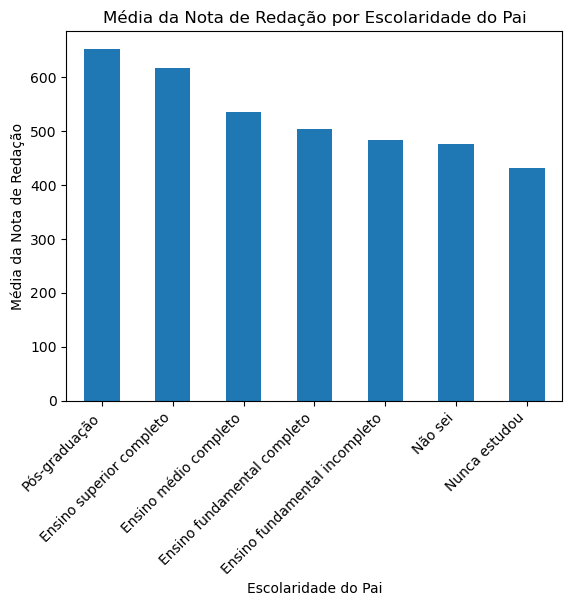

In [229]:
ax = microdadosEnemSelecionado.filter(items=['nota_redacao','escolaridade_pai_desc'])\
    .groupby('escolaridade_pai_desc').mean().sort_values(by='nota_redacao', ascending=False).plot(kind='bar', legend=False)
ax.set_xlabel('Escolaridade do Pai')
ax.set_ylabel('Média da Nota de Redação')
ax.set_title('Média da Nota de Redação por Escolaridade do Pai')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

2 - por Escolaridade da Mãe

[Text(0, 0, 'Pós-graduação'),
 Text(1, 0, 'Ensino superior completo'),
 Text(2, 0, 'Ensino médio completo'),
 Text(3, 0, 'Ensino fundamental completo'),
 Text(4, 0, 'Ensino fundamental incompleto'),
 Text(5, 0, 'Não sei'),
 Text(6, 0, 'Nunca estudou')]

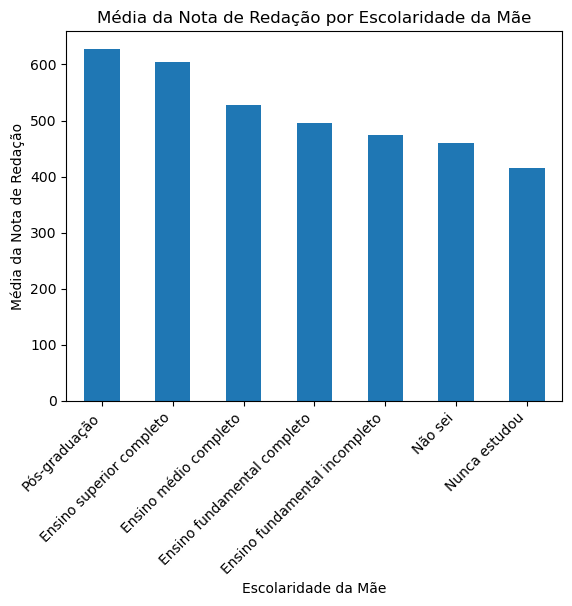

In [230]:
ax = microdadosEnemSelecionado.filter(items=['nota_redacao','escolaridade_mae_desc'])\
    .groupby('escolaridade_mae_desc').mean().sort_values(by='nota_redacao', ascending=False).plot(kind='bar', legend=False)
ax.set_xlabel('Escolaridade da Mãe')
ax.set_ylabel('Média da Nota de Redação')
ax.set_title('Média da Nota de Redação por Escolaridade da Mãe')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

Olhando para outras variáveis além da média:

In [231]:
microdadosEnemSelecionado.filter(items=['nota_redacao','escolaridade_pai_desc']).groupby('escolaridade_pai_desc').describe()

nota_redacao                               \
                                     count        mean         std  min   
escolaridade_pai_desc                                                     
Ensino fundamental completo        32045.0  503.812139  165.753492  0.0   
Ensino fundamental incompleto      48851.0  483.032487  164.893289  0.0   
Ensino médio completo              80823.0  535.028890  169.448736  0.0   
Ensino superior completo           30784.0  616.528716  169.838945  0.0   
Nunca estudou                       2550.0  431.090196  175.187362  0.0   
Não sei                            16074.0  476.024636  166.274945  0.0   
Pós-graduação                      15496.0  652.152814  169.505665  0.0   

                                                            
                                 25%    50%    75%     max  
escolaridade_pai_desc                                       
Ensino fundamental completo    360.0  520.0  600.0   980.0  
Ensino fundamental incompleto  360.0  500.0  600.0   980.0  
Ensino médio completo          400.0  540.0  640.0   980.0  
Ensino superior completo       520.0  620.0  740.0  1000.0  
Nunca estudou                  320.0  420.0  560.0   960.0  
Não sei                        360.0  480.0  580.0   980.0  
Pós-graduação                  560.0  660.0  780.0  1000.0

In [232]:
microdadosEnemSelecionado.filter(items=['nota_redacao','escolaridade_mae_desc']).groupby('escolaridade_mae_desc').describe()

nota_redacao                               \
                                     count        mean         std  min   
escolaridade_mae_desc                                                     
Ensino fundamental completo        32411.0  495.496591  164.518004  0.0   
Ensino fundamental incompleto      37663.0  474.923931  163.853575  0.0   
Ensino médio completo              91488.0  526.906042  169.469606  0.0   
Ensino superior completo           37781.0  604.004658  172.284321  0.0   
Nunca estudou                       1824.0  415.975877  172.038316  0.0   
Não sei                             5354.0  459.940232  167.392270  0.0   
Pós-graduação                      20102.0  628.119590  173.475940  0.0   

                                                            
                                 25%    50%    75%     max  
escolaridade_mae_desc                                       
Ensino fundamental completo    360.0  520.0  600.0   980.0  
Ensino fundamental incompleto  360.0  480.0  580.0   980.0  
Ensino médio completo          380.0  540.0  640.0   980.0  
Ensino superior completo       500.0  600.0  720.0  1000.0  
Nunca estudou                  320.0  400.0  540.0   960.0  
Não sei                        340.0  460.0  580.0   980.0  
Pós-graduação                  520.0  640.0  760.0  1000.0

# Principal resultado obtido das análises

#### A média das notas me matemática e nas notas da redação obedecem uma tendência de crescimento que acompanha o crescimento das escolaridade dos pais e das mães, ou seja, responsáveis mais escolarizados influenciam no aumento da nota dos alunos.


## A tendência se repete se olharmos por Estado... No, nosso caso, analisamos somente SP dado o tamanho dos conjuntos de dados.

# 3. Análise da renda familiar mensal

Agrupando os valores de renda familiar mensal em faixas socioeconômicas mais amplas para facilitar a análise

In [237]:
microdadosEnemRenda = clean_microdados.filter(items=['inscr|icao','nota_mt','nota_redacao','renda_familiar_mensal'])

In [240]:
microdadosEnemRenda['renda_familiar_mensal'] = microdadosEnemRenda['renda_familiar_mensal'].replace(to_replace={
    'Até R$ 1.212,00': 'Renda baixa',
    'R$ 1.212,01 - R$ 1.818,00': 'Renda baixa',
    'R$ 1.818,01 - R$ 3.030,00': 'Renda média baixa',
    'R$ 3.030,01 - R$ 4.848,00': 'Renda média baixa',
    'R$ 4.848,01 - R$ 7.272,00': 'Renda média alta',
    'R$ 7.272,01 - R$ 10.908,00': 'Renda média alta', 
    'R$ 10.908,01 - R$ 18.180,00': 'Renda alta',
    'R$ 18.180,01 - R$ 24.240,00': 'Renda alta',
    'Acima de R$ 24.240,00': 'Renda alta'
})

Filtrando as colunas necessárias para análise da renda vs correlação com as notas de redação e matemática

In [241]:
microdadosEnemRenda.filter(items=['nota_mt','renda_familiar_mensal']).groupby('renda_familiar_mensal').mean().sort_values(by='nota_mt', ascending=False)

,nota_mt
renda_familiar_mensal,
Renda alta,661.320279
Renda média alta,597.064838
Renda média baixa,545.544232
Nenhuma Renda,518.184416
Renda baixa,511.402167


[Text(0, 0, '661.3'),
 Text(0, 0, '597.1'),
 Text(0, 0, '545.5'),
 Text(0, 0, '518.2'),
 Text(0, 0, '511.4')]

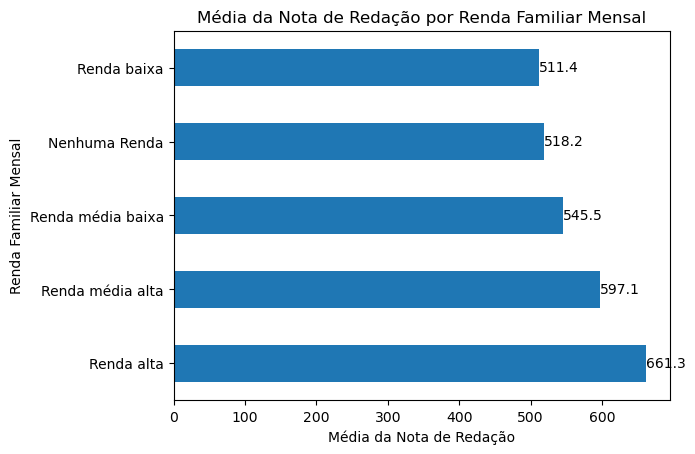

In [242]:
ax = microdadosEnemRenda.filter(items=['nota_mt','renda_familiar_mensal'])\
    .groupby('renda_familiar_mensal').mean().sort_values(by='nota_mt', ascending=False).plot(kind='barh', legend=False)
ax.set_ylabel('Renda Familiar Mensal')
ax.set_xlabel('Média da Nota de Redação')
ax.set_title('Média da Nota de Redação por Renda Familiar Mensal')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.bar_label(ax.containers[0], fmt='%.1f')

In [243]:
microdadosEnemRenda.filter(items=['nota_redacao','renda_familiar_mensal']).groupby('renda_familiar_mensal').mean().sort_values(by='nota_redacao', ascending=False)

,nota_redacao
renda_familiar_mensal,
Renda alta,674.556733
Renda média alta,591.311726
Renda média baixa,511.497372
Renda baixa,460.825515
Nenhuma Renda,454.006839


[Text(0, 0, '674.6'),
 Text(0, 0, '591.3'),
 Text(0, 0, '511.5'),
 Text(0, 0, '460.8'),
 Text(0, 0, '454.0')]

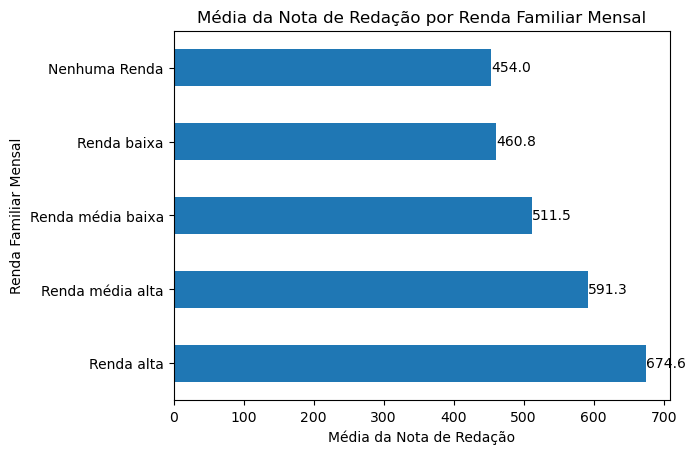

In [244]:
ax = microdadosEnemRenda.filter(items=['nota_redacao','renda_familiar_mensal'])\
    .groupby('renda_familiar_mensal').mean().sort_values(by='nota_redacao', ascending=False).plot(kind='barh', legend=False)
ax.set_ylabel('Renda Familiar Mensal')
ax.set_xlabel('Média da Nota de Redação')
ax.set_title('Média da Nota de Redação por Renda Familiar Mensal')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.bar_label(ax.containers[0], fmt='%.1f')

### Análise de diferença de pontuação entre candidados de maior renda e nenhuma renda

In [245]:
# Calculate the difference in average nota_redacao between each renda_familiar_mensal group
avg_redacao_by_renda = microdadosEnemRenda.groupby('renda_familiar_mensal')['nota_redacao'].mean().sort_values(ascending=False)

# Compute the absolute and relative differences between the highest and lowest average
highest = avg_redacao_by_renda.iloc[0]
lowest = avg_redacao_by_renda.iloc[-1]
absolute_diff = highest - lowest
relative_diff = highest / lowest if lowest != 0 else float('inf')

print("Média da nota de redação por faixa de renda:")
print(avg_redacao_by_renda)
print(f"\nDiferença absoluta: {absolute_diff:.2f} pontos")
print(f"Diferença relativa: {relative_diff:.2f}x")

Média da nota de redação por faixa de renda:
renda_familiar_mensal
Renda alta           674.556733
Renda média alta     591.311726
Renda média baixa    511.497372
Renda baixa          460.825515
Nenhuma Renda        454.006839
Name: nota_redacao, dtype: float64

Diferença absoluta: 220.55 pontos
Diferença relativa: 1.49x


É possível perceber que, em média, quanto maior a renda familiar mensal, maior a nota do candidato. Candidatos com renda acima de R$ 24.240,00 obtiveram uma nota de redação média 1.49 vezes maior que candidatos com nenhuma renda, totalizando uma diferença absoluta de aproximadamente 220 pontos.